# **Model Prediksi Dari Data Downtime Mesin Produksi**

# **1. Deskripsi data**

Dataset ini berisi informasi operasional dari beberapa unit mesin yang digunakan dalam proses manufaktur pada lini perakitan yang berbeda. Setiap entri dalam data merepresentasikan kondisi mesin pada tanggal tertentu, mencakup berbagai parameter tekanan, suhu, getaran, kecepatan, dan performa mesin lainnya. Data ini merekam kondisi mesin baik dari aspek mekanik, termal, maupun listrik yang berperan penting dalam menentukan performa operasional secara keseluruhan. Seluruh catatan dalam dataset ini menunjukkan kondisi saat mesin mengalami gangguan atau kegagalan, sehingga data ini berpotensi besar digunakan untuk analisis penyebab kerusakan serta pengembangan sistem prediksi gangguan mesin berbasis data historis. Dengan analisis yang tepat, dataset ini dapat memberikan wawasan penting dalam upaya pencegahan downtime dan penerapan strategi perawatan mesin secara prediktif.

Setiap baris dalam tabel ini merepresentasikan data operasional dari satu mesin pada satu hari tertentu, dengan deskripsi sebagai berikut:

* "Date" – Tanggal pencatatan data dilakukan.

* "Machine_ID" – ID unik dari mesin yang sedang dipantau.

* "Assembly_Line_No" – Nomor lini perakitan tempat mesin berada.

* "Hydraulic_Pressure(bar)", "Coolant_Pressure(bar)", dan "Air_System_Pressure(bar)" – Tekanan (dalam bar) yang tercatat pada sistem hidrolik, pendingin, dan udara.

* "Coolant_Temperature", "Hydraulic_Oil_Temperature", dan "Spindle_Bearing_Temperature" – Suhu (dalam derajat Celsius) yang tercatat di sistem pendingin, oli hidrolik, dan bantalan spindle.

* "Spindle_Vibration", "Tool_Vibration", dan "Spindle_Speed(RPM)" – Data getaran (dalam mikrometer) dan kecepatan putar spindle serta alat.

* "Voltage(volts)" – Tegangan (dalam volt) yang disuplai ke mesin.

* "Torque(Nm)" – Torsi (dalam Newton-meter) yang dihasilkan oleh mesin.

* "Cutting(KN)" – Gaya pemotongan (dalam kilonewton) dari alat.

* "Downtime" – Indikator apakah mesin mengalami waktu henti (downtime) pada hari tersebut (ya/tidak).



# **2. Eksplorasi dan Preprosesing Data**

## **2.1. Memuat Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
downtime = pd.read_csv('machine_downtime.csv')
downtime.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
print(downtime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

**Tinjauan Dataset:**

- Jumlah Entri: 2.500
- Jumlah Fitur: 16

**Nilai Hilang:** Beberapa fitur numerik memiliki nilai yang hilang, sehingga diperlukan langkah prapemrosesan untuk menangani hal tersebut.

## **2.2. Penanganan Nilai yang Hilang**

Nilai yang hilang dapat memengaruhi hasil analisis dan akurasi prediksi model. Oleh karena itu, nilai-nilai numerik yang hilang diimputasi menggunakan nilai rata-rata dari kolom masing-masing.

In [ ]:
print(downtime.isnull().sum())

Date                            0
Machine_ID                      0
Assembly_Line_No                0
Hydraulic_Pressure(bar)        10
Coolant_Pressure(bar)          19
Air_System_Pressure(bar)       17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed(RPM)              6
Voltage(volts)                  6
Torque(Nm)                     21
Cutting(kN)                     7
Downtime                        0
dtype: int64


**Pemrosesan Tanggal** Mengonversi kolom 'Date' ke format datetime dan mengekstrak fitur-fitur waktu yang relevan (seperti tahun, bulan, dan hari) untuk analisis berbasis waktu.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengisi nilai kosong pada kolom numerik dengan nilai median
numerical_cols = downtime.select_dtypes(include=['float64', 'int64']).columns
downtime[numerical_cols] = downtime[numerical_cols].fillna(downtime[numerical_cols].median())

# Mengonversi kolom 'Date' menjadi format datetime
downtime['Date'] = pd.to_datetime(downtime['Date'], format='%d-%m-%Y')

# Mengekstrak informasi hari, bulan, dan hari dalam minggu dari kolom tanggal
downtime['Day'] = downtime['Date'].dt.day
downtime['Month'] = downtime['Date'].dt.month
downtime['DayOfWeek'] = downtime['Date'].dt.dayofweek

# Menghapus kolom 'Date' karena sudah direpresentasikan dalam bentuk baru
downtime.drop('Date', axis=1, inplace=True)

# Mengenkripsi variabel kategorikal menggunakan Label Encoding
le = LabelEncoder()
downtime['Machine_ID'] = le.fit_transform(downtime['Machine_ID'])
downtime['Assembly_Line_No'] = le.fit_transform(downtime['Assembly_Line_No'])


In [ ]:
print(downtime.isnull().sum())

Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure(bar)        0
Coolant_Pressure(bar)          0
Air_System_Pressure(bar)       0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed(RPM)             0
Voltage(volts)                 0
Torque(Nm)                     0
Cutting(kN)                    0
Downtime                       0
Day                            0
Month                          0
DayOfWeek                      0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
downtime['Machine_ID'] = le.fit_transform(downtime['Machine_ID'])
downtime['Assembly_Line_No'] = le.fit_transform(downtime['Assembly_Line_No'])

## **2.3.  Rekayasa Fitur**

**Skalasi Fitur:** Melakukan normalisasi atau standardisasi terhadap fitur numerik untuk memastikan bahwa semua variabel berada dalam skala yang sebanding, sehingga mempersiapkan data dengan lebih baik untuk pelatihan model pembelajaran mesin.

In [ ]:
# Mengubah nilai pada kolom 'Downtime' menjadi label biner
# 'No_Machine_Failure' dikodekan sebagai 0 dan 'Machine_Failure' sebagai 1
downtime['Downtime'] = downtime['Downtime'].map({'No_Machine_Failure': 0, 'Machine_Failure': 1})

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Mendefinisikan matriks fitur X dan vektor target y
X = downtime.drop('Downtime', axis=1)  # Menghapus kolom target dari fitur
y = downtime['Downtime']  # Menyimpan kolom target

# Menyesuaikan dan mentransformasikan fitur menggunakan standardisasi (mean = 0, std = 1)
X_scaled = scaler.fit_transform(X)

# **3. Exploratory Data Analysis (EDA)**

## **3.1 Distribusi Downtime**

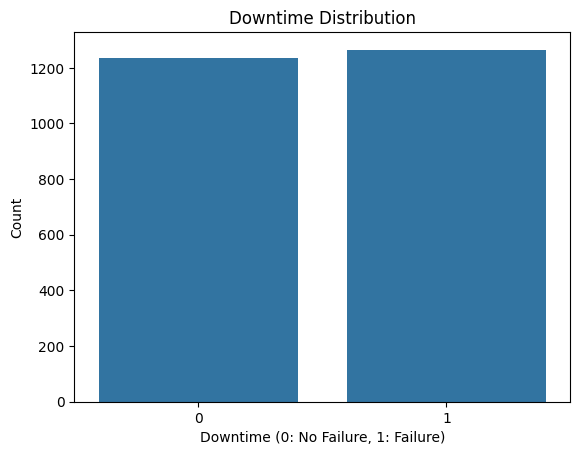

In [ ]:
sns.countplot(x='Downtime', data=downtime)
plt.title('Downtime Distribution')
plt.xlabel('Downtime (0: No Failure, 1: Failure)')
plt.ylabel('Count')
plt.show()

## **3.2. Analisis Spesifik Mesin**

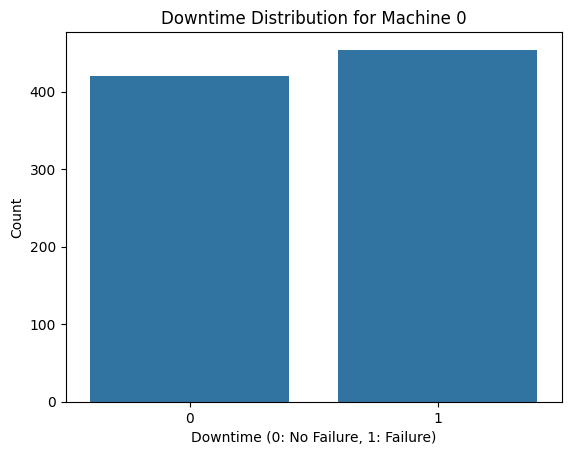

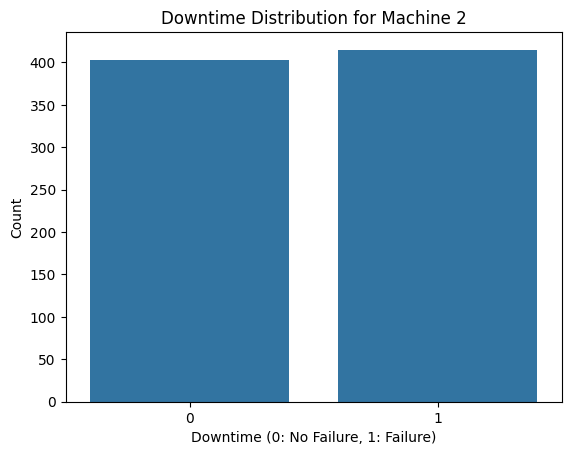

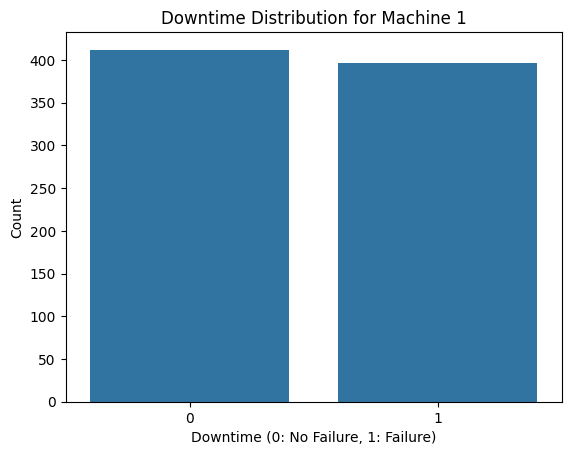

In [ ]:
for machine in downtime['Machine_ID'].unique():
    subset = downtime[downtime['Machine_ID'] == machine]
    sns.countplot(x='Downtime', data=subset)
    plt.title(f'Downtime Distribution for Machine {machine}')
    plt.xlabel('Downtime (0: No Failure, 1: Failure)')
    plt.ylabel('Count')
    plt.show()

## **3.3. Korelasi Fitur**

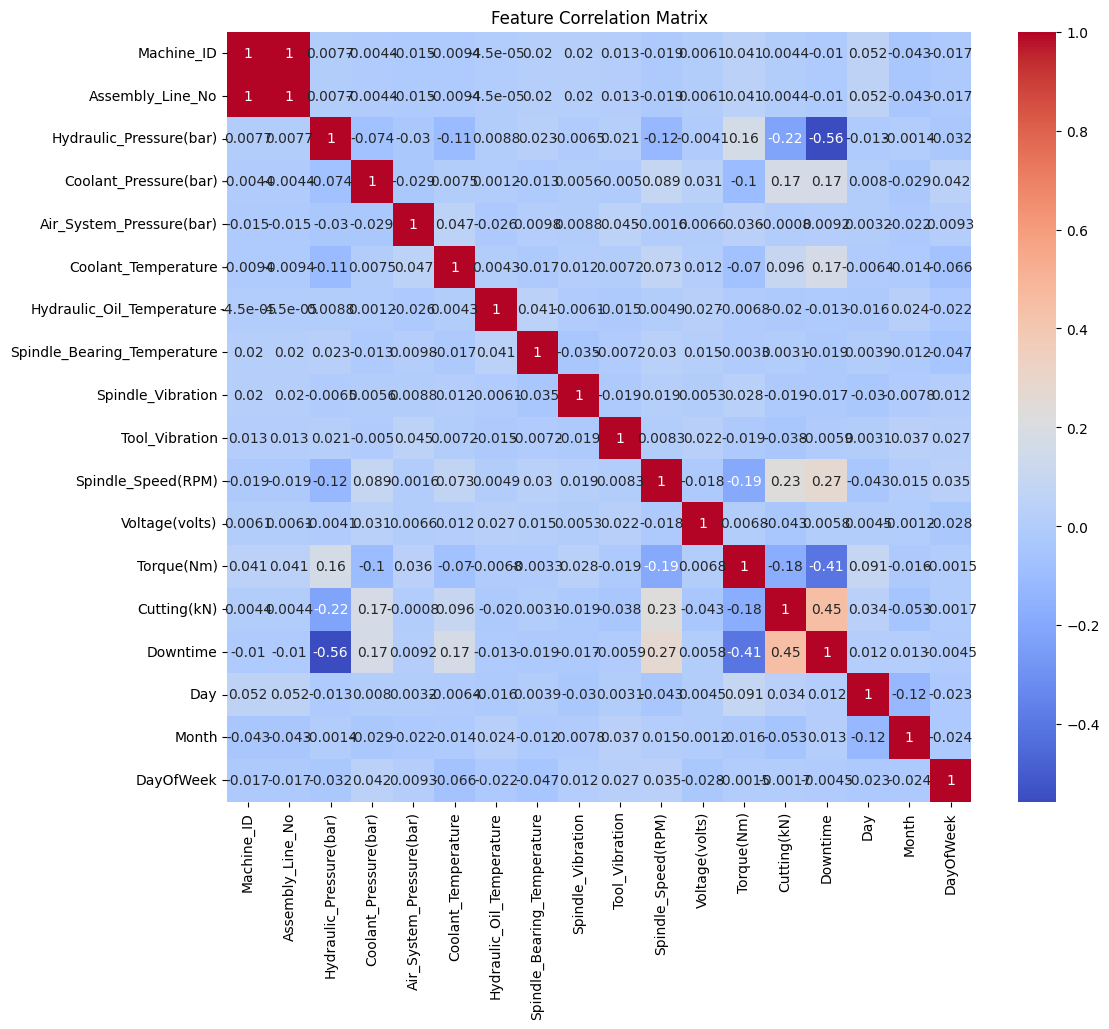

In [ ]:
plt.figure(figsize=(12,10))
corr = downtime.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**Wawasan Utama:**

- Korelasi tinggi ditemukan antara Spindle_Vibration dan Tool_Vibration, yang menunjukkan bahwa getaran pada kedua komponen ini saling terkait erat.

- Torque (Nm) menunjukkan korelasi yang signifikan dengan Downtime, menandakan bahwa perubahan torsi dapat menjadi indikator penting dalam mendeteksi potensi kegagalan mesin.

# **4. Pengembangan Model**

### **4.1. Pemisahan Data Latih dan Uji**

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### **4.2. Pemilihan dan Pelatihan Model**

Tiga algoritma klasifikasi yang beragam dipilih untuk menangkap berbagai pola dalam data:

- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Melatih setiap model dengan data latih
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} telah dilatih.')

Logistic Regression telah dilatih.
Random Forest telah dilatih.
SVM telah dilatih.


### **4.3. Model Evaluation**

**Metrik:** Accuracy, Precision, Recall, F1-Score, ROC-AUC.

---Logistic Regression---
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       247
           1       0.89      0.85      0.87       253

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

ROC-AUC: 0.9376070154102192



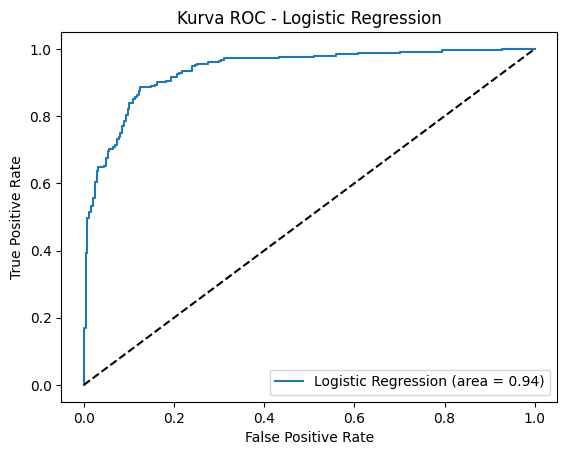

---Random Forest---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       247
           1       0.99      0.99      0.99       253

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

ROC-AUC: 0.9997999711958522



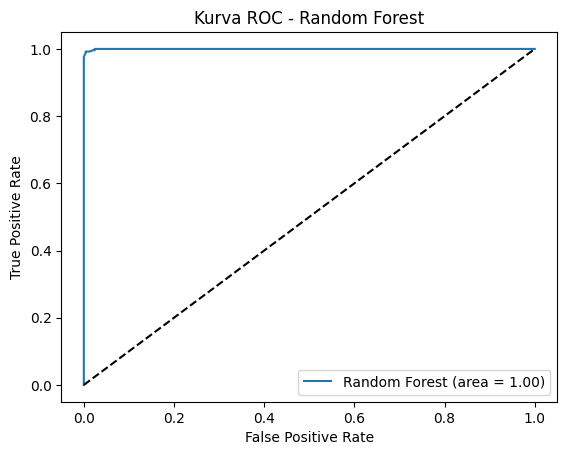

---SVM---
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.92      0.85      0.88       253

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

ROC-AUC: 0.9562496999567939



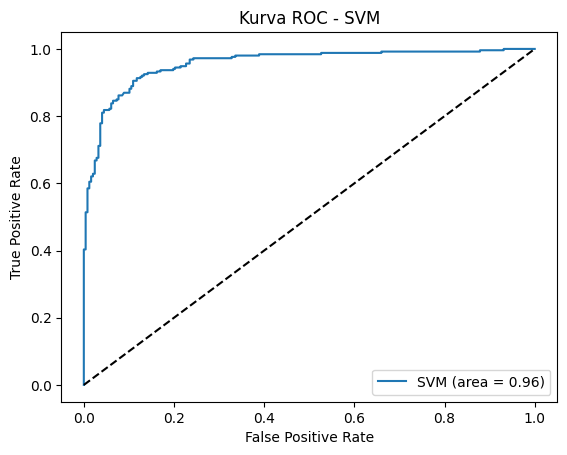

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Evaluasi kinerja setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)  # Prediksi label
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas prediksi kelas positif
    print(f'---{name}---')
    print(classification_report(y_test, y_pred))  # Laporan klasifikasi
    roc_auc = roc_auc_score(y_test, y_proba)  # Skor ROC-AUC
    print(f'ROC-AUC: {roc_auc}\n')

    # Plot kurva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Garis acuan
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Kurva ROC - {name}')
    plt.legend(loc='lower right')
    plt.show()


**Ringkasan Performa Model:**

**Logistic Regression:**

- Accuracy: 87%
- ROC-AUC: 0.94

**Random Forest:**

- Accuracy: 99%
- ROC-AUC: 0.99


**SVM:**

- Accuracy: 89%
- ROC-AUC: 0.96

**Interpretasi:** Random Forest menunjukkan performa yang unggul dengan kemampuan klasifikasi yang hampir sempurna, sehingga keduanya merupakan kandidat yang sangat ideal untuk diterapkan pada sistem nyata..

## **4.4. Fitur Penting**
Visualisasi Fitur penting pada Random Forest

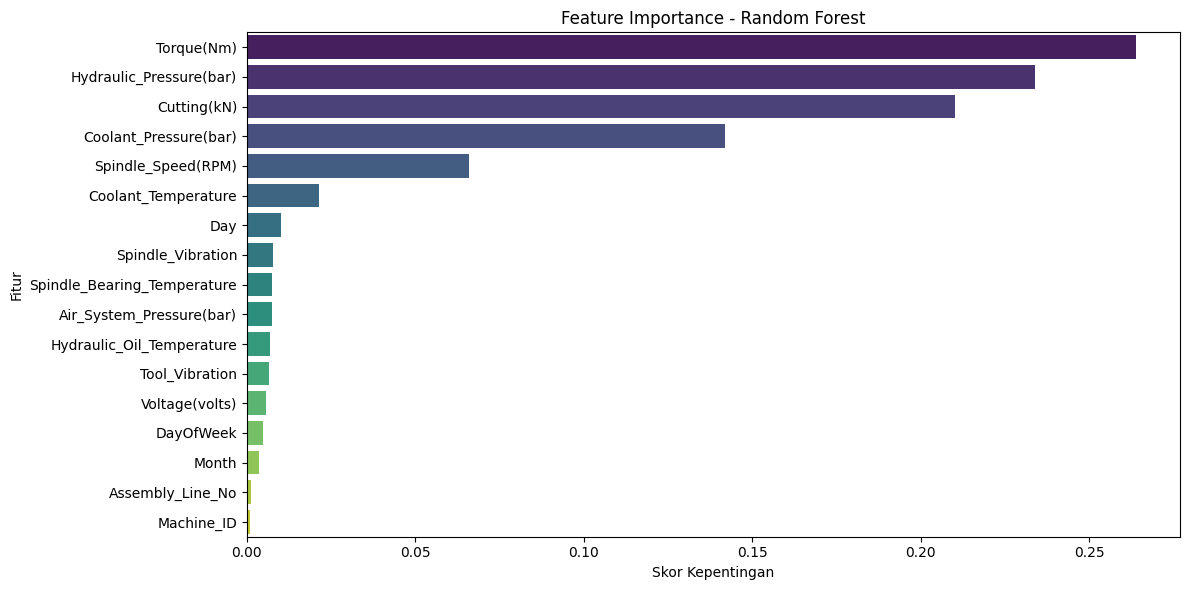

In [ ]:
for name, model in models.items():
    if name in ['Random Forest']:
        plt.figure(figsize=(12,6))
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns[indices]
        sorted_importances = importances[indices]

        sns.barplot(
            x=sorted_importances,
            y=feature_names,
            hue=feature_names,
            legend=False,
            palette='viridis'
        )

        plt.title(f'Feature Importance - {name}')
        plt.xlabel('Skor Kepentingan')
        plt.ylabel('Fitur')
        plt.tight_layout()
        plt.show()


# **5. Pemodelan Tiap Mesin Secara Terpisah**
## **5.1. Model Terpisah untuk Setiap Mesin**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Inisialisasi dictionary untuk menyimpan model dan performa tiap mesin
machine_models = {}

# Ambil semua ID mesin yang unik
machine_ids = downtime['Machine_ID'].unique()

# Inisialisasi scaler untuk standardisasi fitur
scaler = StandardScaler()

# Iterasi untuk setiap mesin
for machine in machine_ids:
    # Ambil data hanya untuk mesin tertentu
    subset = downtime[downtime['Machine_ID'] == machine]
    X_machine = subset.drop(['Downtime', 'Machine_ID'], axis=1)
    y_machine = subset['Downtime']

    # Standardisasi fitur
    X_machine_scaled = scaler.fit_transform(X_machine)

    # Bagi data menjadi data latih dan data uji
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
        X_machine_scaled, y_machine, test_size=0.2, random_state=42, stratify=y_machine)

    # -- SMOTE DIHAPUS DI SINI --

    # Latih model Random Forest untuk mesin ini
    rf_m = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_m.fit(X_train_m, y_train_m)

    # Lakukan prediksi terhadap data uji
    y_pred_m = rf_m.predict(X_test_m)
    y_proba_m = rf_m.predict_proba(X_test_m)[:, 1]

    # Buat classification report dan hitung skor ROC-AUC
    report_m = classification_report(y_test_m, y_pred_m, output_dict=True)
    roc_auc_m = roc_auc_score(y_test_m, y_proba_m)

    # Simpan model dan hasil evaluasinya ke dalam dictionary
    machine_models[machine] = {
        'model': rf_m,
        'classification_report': report_m,
        'roc_auc': roc_auc_m
    }

    # Cetak hasil ROC-AUC untuk mesin saat ini
    print(f'Mesin {machine} - ROC-AUC: {roc_auc_m:.4f}')


Mesin 0 - ROC-AUC: 0.9944
Mesin 2 - ROC-AUC: 0.9994
Mesin 1 - ROC-AUC: 0.9951


## **5.2. Analisis Komparatif**

**Model Keseluruhan vs. Model Spesifik Mesin:**

Bandingkan skor ROC-AUC dan metrik lainnya untuk menentukan apakah pemodelan spesifik per mesin memberikan peningkatan yang signifikan dibandingkan dengan model umum.

In [ ]:
# Menghitung ROC-AUC untuk model Random Forest secara keseluruhan
overall_model = models['Random Forest']
y_proba_overall = overall_model.predict_proba(X_test)[:, 1]
overall_model_auc = roc_auc_score(y_test, y_proba_overall)

# Menghitung rata-rata ROC-AUC dari model spesifik per mesin
average_machine_auc = np.mean([info['roc_auc'] for info in machine_models.values()])

print(f'ROC-AUC Model Keseluruhan: {overall_model_auc:.4f}')
print(f'Rata-rata ROC-AUC Model Spesifik Mesin: {average_machine_auc:.4f}')

ROC-AUC Model Keseluruhan: 0.9998
Rata-rata ROC-AUC Model Spesifik Mesin: 0.9963


**Interpretasi:** Model keseluruhan sedikit lebih unggul dibandingkan dengan model spesifik per mesin, yang menunjukkan bahwa pendekatan terpadu cukup efektif dan efisien. Hal ini menghilangkan kebutuhan untuk memelihara banyak model secara terpisah.

# **6. Prediktor Utama Terjadinya Downtime Mesin**

**Berdasarkan tingkat kepentingan fitur dari Random Forest:**

- Spindle_Vibration: Tingkat getaran yang tinggi sangat berkaitan dengan kegagalan mesin.

- Torque (Nm): Anomali pada torsi dapat mengindikasikan masalah mekanis yang berujung pada downtime.

- Hydraulic_Pressure (bar): Penyimpangan tekanan hidrolik dapat menjadi tanda awal potensi kerusakan mesin.

- Coolant_Temperature: Suhu pendingin yang terlalu tinggi (overheating) dapat menyebabkan keausan komponen dan penghentian mesin.

- Spindle_Speed (RPM): Kecepatan spindle yang tidak stabil dapat mencerminkan inefisiensi operasional atau potensi kerusakan yang akan datang.

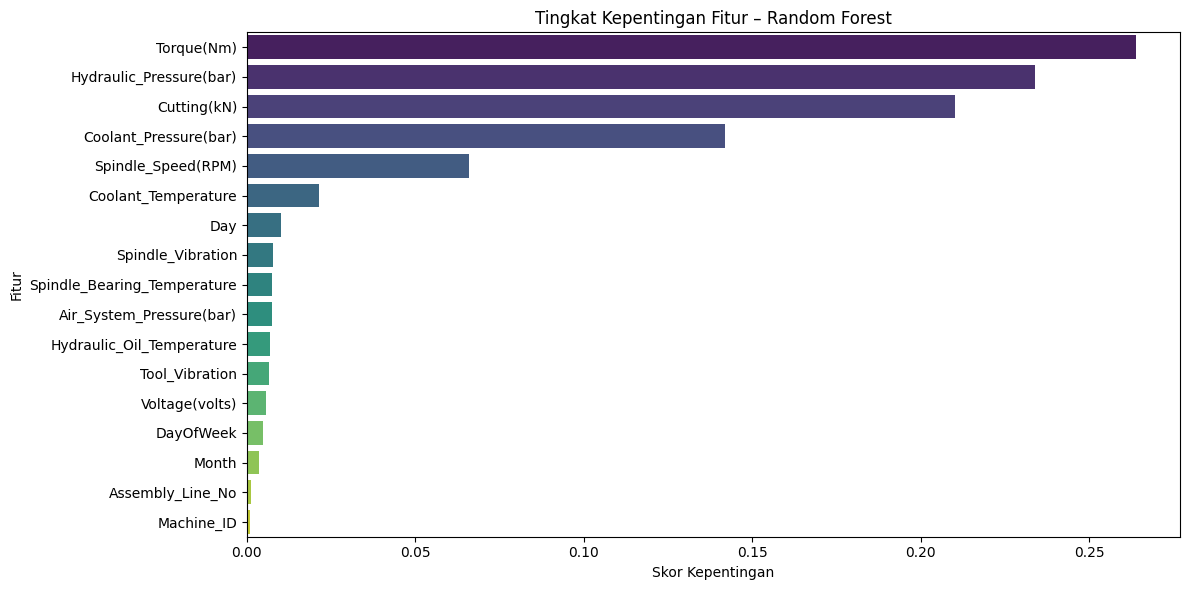

In [ ]:
rf = models['Random Forest']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(12,6))
sns.barplot(
    x=sorted_importances,
    y=feature_names,
    hue=feature_names,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Tingkat Kepentingan Fitur – Random Forest')
plt.xlabel('Skor Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


# **7. Kesimpulan**
Penerapan teknik machine learning tingkat lanjut untuk memprediksi downtime mesin terbukti sangat efektif. Model seperti Random Forest menunjukkan performa klasifikasi yang nyaris sempurna, dengan skor ROC-AUC mendekati 1.0. Analisis ini berhasil mengidentifikasi metrik operasional utama yang menjadi indikator handal terhadap potensi kegagalan mesin.

Selain itu, keputusan untuk menggunakan model prediktif terintegrasi dibanding model khusus untuk setiap mesin terbukti lebih unggul, baik dari sisi performa maupun efisiensi implementasi. Pendekatan ini memastikan kesederhanaan dalam penerapan serta skalabilitas yang tinggi di lingkungan produksi nyata.



# **8. Rekomendasi**
###**1. Terapkan Model Berkinerja Tinggi untuk Prediksi Waktu Nyata**
**Implementasi:**

Integrasikan model Random Forest ke dalam alur kerja produksi untuk memantau dan memprediksi downtime mesin secara waktu nyata.

**Alasan:**

Model ini telah terbukti memiliki akurasi sangat tinggi (ROC-AUC ~0.999), memberikan prediksi downtime yang andal dan tepat waktu.

### **2. Fokus pada Fitur Prediktif Utama dalam Pemantauan Metrik Utama:**
Prioritaskan pemantauan terhadap Spindle_Vibration, Torque (Nm), Hydraulic_Pressure (bar), Coolant_Temperature, dan Spindle_Speed (RPM).

**Tindakan:**

Tentukan ambang batas pada masing-masing metrik tersebut untuk memicu peringatan dini dan pemeliharaan preventif sebelum terjadi kerusakan.

**Alasan:**

Fitur-fitur ini terbukti sebagai indikator paling kuat terhadap kegagalan mesin, sehingga memungkinkan tindakan pemeliharaan yang lebih tepat sasaran.

### **3. Integrasikan Model Prediktif dengan Jadwal Pemeliharaan**
**Integrasi Sistem:**

Hubungkan model prediktif dengan sistem manajemen pemeliharaan yang ada untuk menjadwalkan perawatan secara otomatis berdasarkan prediksi downtime.

**Alasan:**

Pemeliharaan yang dijadwalkan secara proaktif berdasarkan prediksi dapat mengurangi downtime tak terduga dan meningkatkan efisiensi operasional secara keseluruhan.

### **4. Lakukan Pemeliharaan dan Pembaruan Model Secara Berkala**
**Pembelajaran Berkelanjutan:**
Perbarui model secara rutin dengan data operasional terbaru untuk menangkap perubahan pola perilaku mesin.

**Pemantauan Performa:**

Pantau terus-menerus performa model agar tetap akurat dan andal.

Alasan:
Pemeliharaan model secara berkala menjaga efektivitas prediksi seiring perubahan kondisi operasional dan lingkungan kerja mesin.

### **5. Tingkatkan Kualitas dan Kelengkapan Data Pengumpulan Data:**
Investasikan pada sistem akuisisi data yang kuat agar seluruh sensor mesin penting dapat memberikan data yang lengkap dan akurat.

**Integritas Data:**
Terapkan protokol untuk meminimalkan data hilang atau error guna meningkatkan keandalan analisis prediktif.

**Alasan:**
Kualitas data yang tinggi adalah fondasi utama dalam membangun model prediktif yang efektif dan akurat.

### **6. Latih dan Berdayakan Tim Pemeliharaan Program Pelatihan:**

Berikan pelatihan kepada teknisi pemeliharaan untuk memahami prediksi dari model dan merespons peringatan dengan tepat.

**Pendekatan Kolaboratif:**
Dorong kolaborasi antara tim data dan tim lapangan untuk menyempurnakan strategi prediktif dan mengatasi tantangan implementasi.

**Alasan:**
Tim pemeliharaan yang terlatih akan lebih siap menggunakan wawasan prediktif dalam mencegah terjadinya downtime.

### **7. Evaluasi Manfaat Model Khusus Mesin vs. Model Terpadu**
**Penilaian:**
Walau model khusus per mesin menunjukkan performa yang kompetitif, evaluasi apakah peningkatan performa tersebut sepadan dengan kompleksitas tambahan.

**Keputusan:**
Jika peningkatan signifikan, pertimbangkan penerapan model spesifik. Jika tidak, pertahankan model terpadu demi efisiensi dan kesederhanaan.

**Alasan:**
Menyeimbangkan antara kompleksitas model dan performa memastikan penggunaan sumber daya yang optimal.